# Appliquer les transformations FFT et DCT pour bloquer 8x8 de l'image

In [1]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import ndimage
from skimage import data, img_as_float
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from skimage.io import imshow
from numpy import r_

## application fft en blocs 8x8 de l'image



In [2]:
im=data.camera()
imsize = im.shape
print(imsize)
im_fft = np.zeros(imsize)
im_fft_shift = np.zeros(imsize)

# Do 8x8 FFT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_fft[i:(i+8),j:(j+8)] = fft2( im[i:(i+8),j:(j+8)])
        im_fft_shift[i:(i+8),j:(j+8)] = fftshift( im_fft[i:(i+8),j:(j+8)])

(512, 512)


/tmp/ipykernel_3300/1214870164.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  im_fft[i:(i+8),j:(j+8)] = fft2( im[i:(i+8),j:(j+8)])


Exportation d'un bloc 8x8 de l'image et des coefficients FFT correspondants

Text(0.5, 1.0, 'An 8x8 FFT shift block')

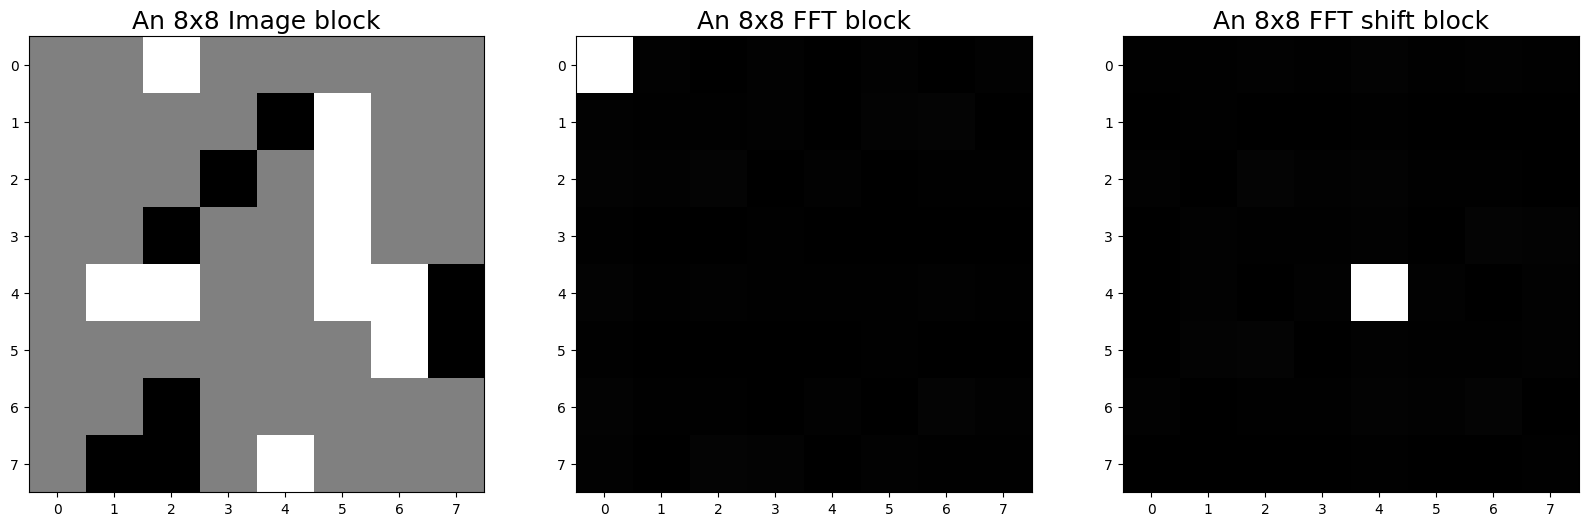

In [3]:
pos =  248

f, (ax0, ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))

# Extract a block from image
ax0.imshow(abs(im[pos:pos+8,pos:pos+8]),cmap='gray')
ax0.set_title( "An 8x8 Image block", fontsize=18)

# Display the fft of that block
ax1.imshow(abs(im_fft[pos:pos+8,pos:pos+8]),cmap='gray')
ax1.set_title( "An 8x8 FFT block", fontsize=18)

# Display the fftshift of that block
ax2.imshow(abs(im_fft_shift[pos:pos+8,pos:pos+8]),cmap='gray')
ax2.set_title( "An 8x8 FFT shift block", fontsize=18)




Afficher tous les blocs FFT

Text(0.5, 1.0, '8x8 FFTs shift of the image')

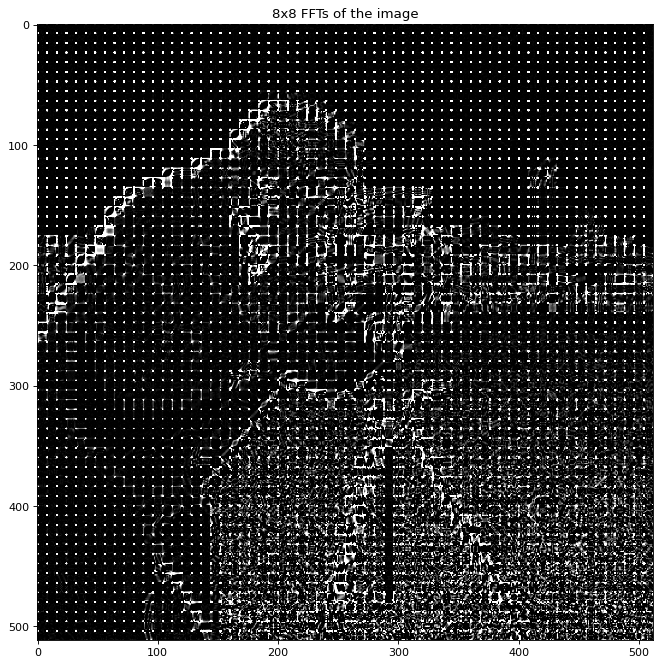

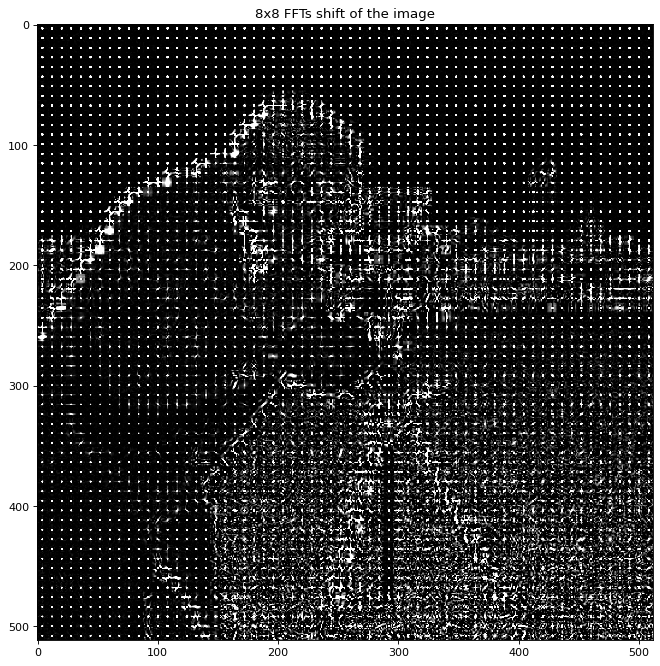

In [4]:
# Display entire 8x8 FFT
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(im_fft,cmap='gray',vmax = np.max(im_fft)*0.01,vmin = 0)
plt.title( "8x8 FFTs of the image")

# Display entire 8x8 FFT shift
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(im_fft_shift,cmap='gray',vmax = np.max(im_fft)*0.01,vmin = 0)
plt.title( "8x8 FFTs shift of the image")

## Application DCT en blocs 8x8 de l'image


In [5]:
from scipy.fftpack import  dct,idct

def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [6]:
imsize = im.shape
print(imsize)
im_dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)])

(512, 512)


Exportation d'un bloc 8x8 de l'image et de ses coefficients DCT correspondants

Text(0.5, 1.0, 'An 8x8 DCT block')

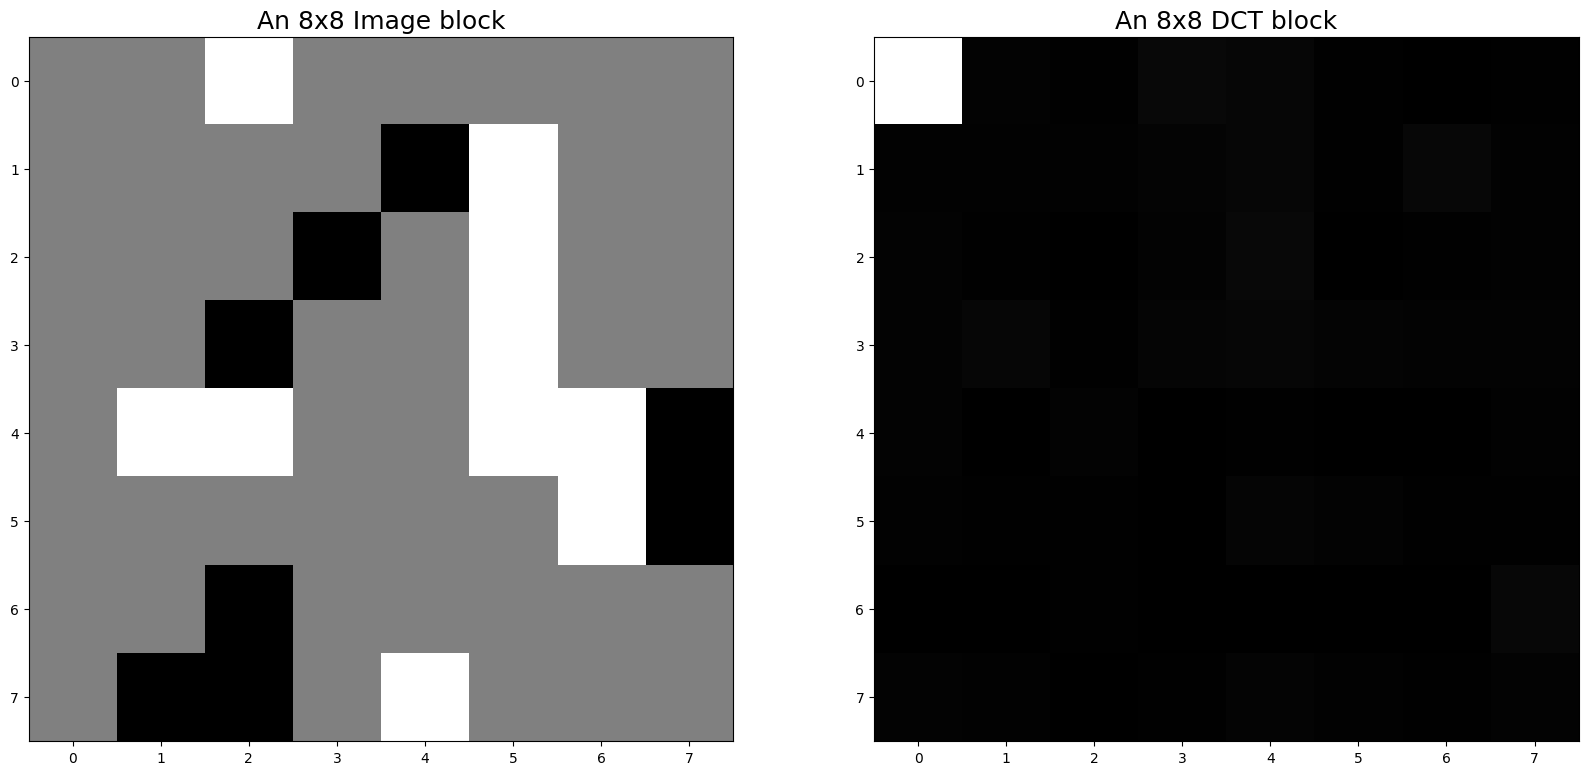

In [7]:
pos =  248

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

# Extract a block from image
ax0.imshow(abs(im[pos:pos+8,pos:pos+8]),cmap='gray')
ax0.set_title( "An 8x8 Image block", fontsize=18)

# Display the dct of that block
ax1.imshow(abs(im_dct[pos:pos+8,pos:pos+8]),cmap='gray')
ax1.set_title( "An 8x8 DCT block", fontsize=18)



Afficher tous les blocs DCT

Text(0.5, 1.0, '8x8 DCTs of the image')

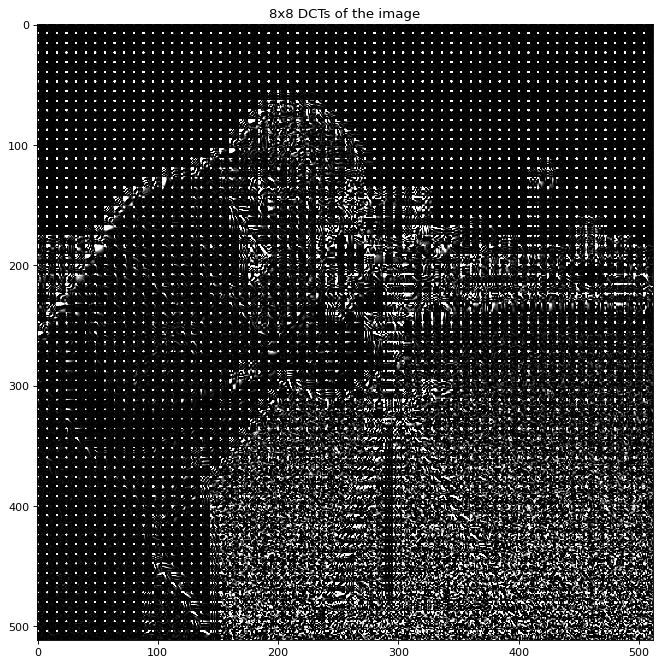

In [8]:
# Display entire 8x8 DCT
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(im_dct,cmap='gray',vmax = np.max(im_dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Text(0.5, 1.0, 'Comparison between original and after DCT images')

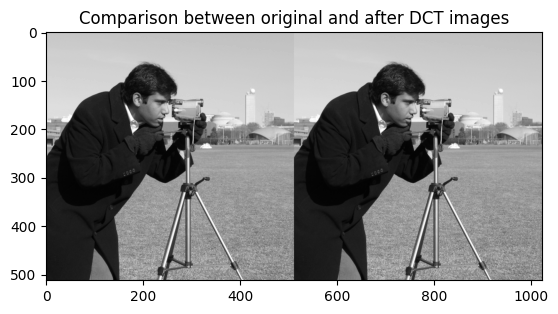

In [9]:
im_idct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_idct[i:(i+8),j:(j+8)] = idct2(im_dct[i:(i+8),j:(j+8)])
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_idct) ) ,cmap='gray')
plt.title("Comparison between original and after DCT images" )